# Lecture 16: Clustering

Plan:
Topic 1: Cluster Blobs Data
1. Set up imports
2. Load our data
3. Plot the data
4. Cluster the data using K-means, DBSCAN, and Agglomerative
5. Plot the clustering results

Topic 2: Cluster the Digits Dataset
1. Load our data
2. Plot the data
3. Cluster the data using K-means, DBSCAN, and Agglomerative
4. Plot the clustering results
5. Evaluate how well the clusters match the true clusters (the digits)

In [2]:
from sklearn.datasets import make_blobs, load_digits
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

In [5]:
# generate blobs data
centers = [[1, 1], [-1, -1], [1, -1]]

X, labels_true = make_blobs(n_samples=750, cluster_std=0.4, centers=centers, random_state=42)

# labels_true

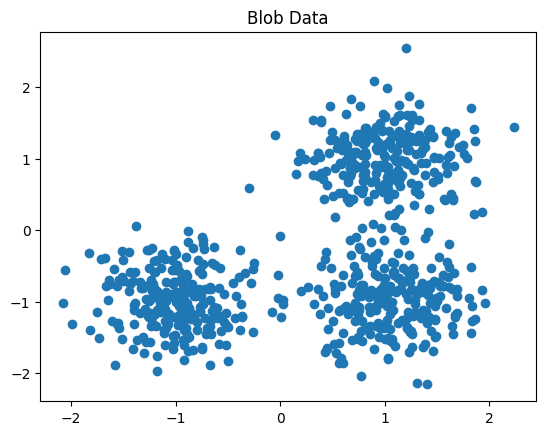

In [7]:
# plot the data
plt.scatter(X[:, 0], X[:, 1])
plt.title('Blob Data')
plt.show()

In [8]:
# run k-means clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

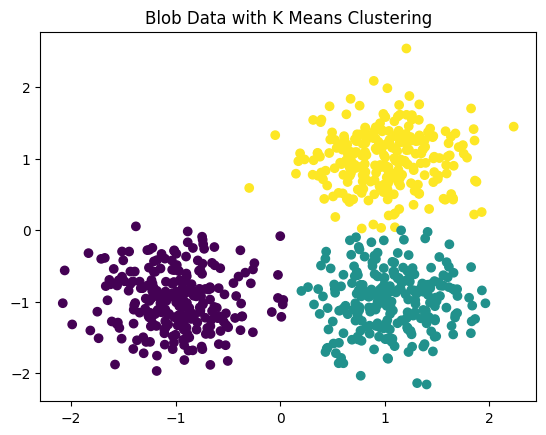

In [9]:
# plot k-means results
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
plt.title('Blob Data with K Means Clustering')
plt.show()

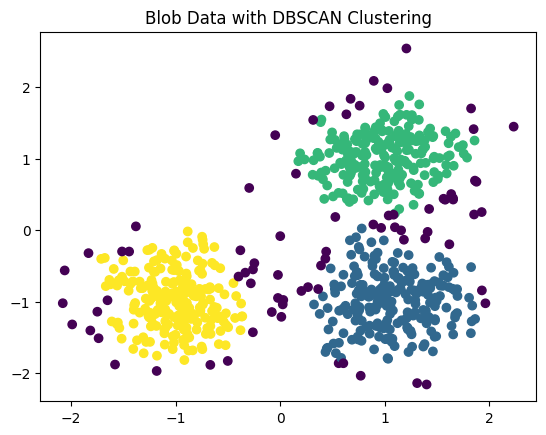

In [18]:
# run DBSCAN
dbscan = DBSCAN(eps=0.22, min_samples=10)
dbscan.fit(X)

# plot DBSCAN results
plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_)
plt.title('Blob Data with DBSCAN Clustering')
plt.show()

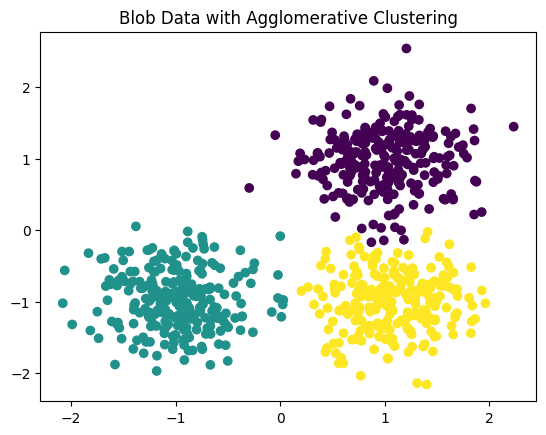

In [21]:
# run agglomerative clustering
agg = AgglomerativeClustering(n_clusters=3)
agg.fit(X)

# plot agg clusters
plt.scatter(X[:, 0], X[:, 1], c=agg.labels_)
plt.title('Blob Data with Agglomerative Clustering')
plt.show()

### Now look at Digits Dataset

In [24]:
digits = load_digits()
X = digits.data
y_true = digits.target

y_true

array([0, 1, 2, ..., 8, 9, 8], shape=(1797,))

In [25]:
# do dimension reduction
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y_true)

X_lda

array([[-2.0146322 , -5.62348616],
       [ 0.2209674 ,  3.59240033],
       [ 2.23485453,  2.70950363],
       ...,
       [-1.04697178,  1.48367733],
       [ 0.40787292, -1.99167301],
       [ 0.17414501,  0.88717463]], shape=(1797, 2))

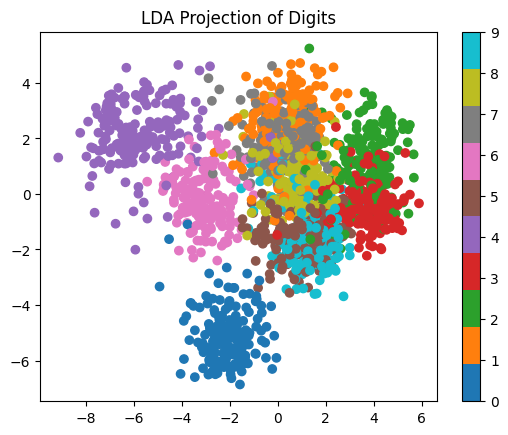

In [29]:
# plot the transformed data
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y_true, cmap="tab10")
plt.title('LDA Projection of Digits')
plt.colorbar()
plt.show()

0.725814218974996


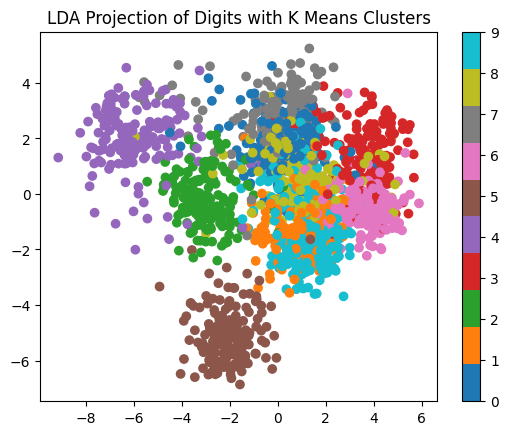

In [32]:
# K means clustering
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X)

kmeans_ari = adjusted_rand_score(y_true, kmeans.labels_)
print(kmeans_ari)

# plot the transformed data
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=kmeans.labels_, cmap="tab10")
plt.title('LDA Projection of Digits with K Means Clusters')
plt.colorbar()
plt.show()

0.1101692718899196


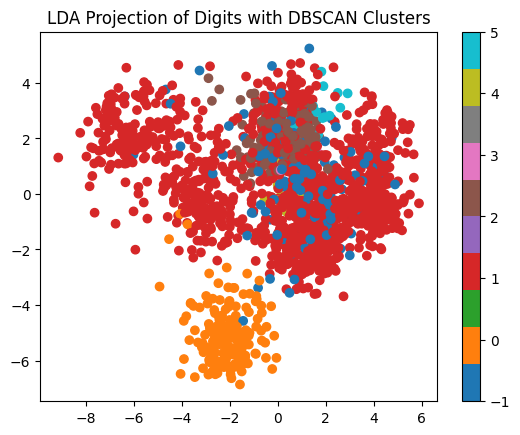

In [41]:
# DBSCAN clustering
dbscan = DBSCAN(eps=25, min_samples=10)
dbscan.fit(X)

dbscan_ari = adjusted_rand_score(y_true, dbscan.labels_)
print(dbscan_ari)

# plot the transformed data
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=dbscan.labels_, cmap="tab10")
plt.title('LDA Projection of Digits with DBSCAN Clusters')
plt.colorbar()
plt.show()